In [5]:
import os
import numpy as np
import mne
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib

In [6]:
# read raw data files 
raw = mne.io.read_raw_edf("Original participant EEGs\\1Sept\\test.edf", preload = True)
rawfull = mne.io.read_raw_edf("Original participant EEGs\\1Sept\\test.edf", preload = True)

# Filter data
raw.filter(l_freq=0.5, h_freq=40)
rawfull.filter(l_freq=0.5, h_freq=40)
#mne.filter.filter_data(raw, sfreq = 128, l_freq = .5, h_freq=40)


Extracting EDF parameters from C:\Users\andre\Desktop\dataEEG\Original participant EEGs\1Sept\test.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227455  =      0.000 ...  1776.992 secs...
Extracting EDF parameters from C:\Users\andre\Desktop\dataEEG\Original participant EEGs\1Sept\test.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 227455  =      0.000 ...  1776.992 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff freque

<RawEDF  |  test.edf, n_channels x n_times : 14 x 227456 (1777.0 sec), ~24.3 MB, data loaded>

In [7]:
tmin, tmax = 0  , 60 # use the first 20s of data
raw.crop(tmin, tmax).load_data()

# Pick a subset of channels (here for speed reasons)
selection = ['TP10']
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False,
                       stim=False, exclude='bads', selection=selection)

# 2 Different ways of extracting data
data, times = raw[picks] 
data1 = data[0]

raw2 = raw.get_data(picks=picks)
raw2 = raw2[0]
rawfull = rawfull.get_data(picks=picks)
rawfull = rawfull[0]



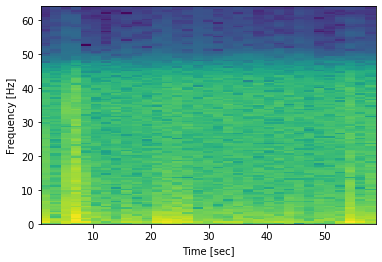

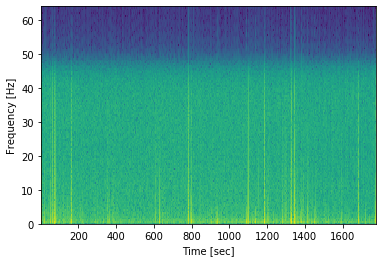

In [8]:
fs = 128 # Sampling frequenzy rate

# "Short" signal
f, t, Sxx = signal.spectrogram(raw2, fs)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Full signal
f, t, Sxx = signal.spectrogram(rawfull, fs)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [291]:
# Construct x, input for the CNN model
x = Sxx.flatten('F')
len(x)

130935